{'teamwork': 7.0, 'communication': 0, 'deadline': 3.5, 'Efficiency': 14.1}
{'teamwork': 0, 'communication': 6.999999999999998, 'deadline': 0, 'Efficiency': 0}
Achievements: Teamwork was good.; Efficiency was very good.


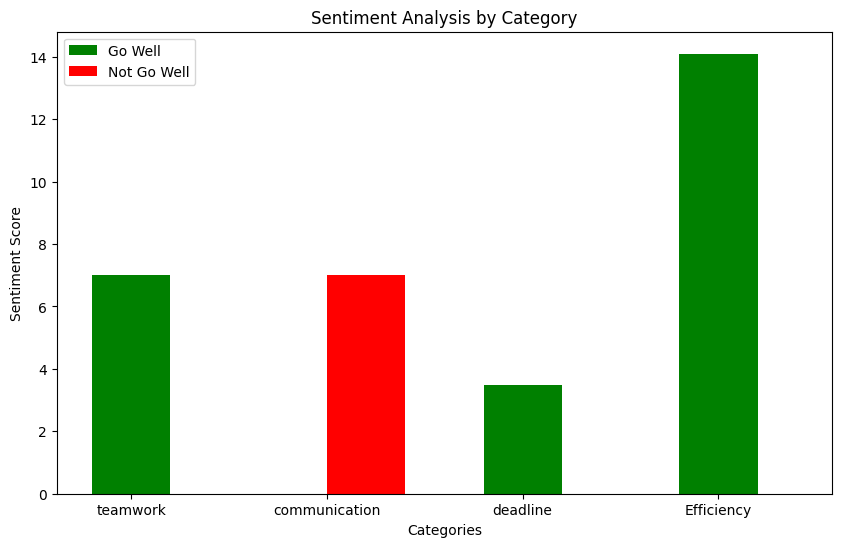

In [ ]:
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

# Define categories and keywords
categories = ["teamwork", "communication", "deadline","Efficiency"]
keywords = {
    "teamwork": ["teamwork", "collaboration", "support"],
    "communication": ["communication", "clarity", "messages"],
    "deadline": ["deadline", "timeliness", "on time"],
    "Efficiency": ["efficiency", "improve", "better"]
}

def process_data(content):
    go_well_data = {category: 0 for category in categories}
    not_go_well_data = {category: 0 for category in categories}
    achievements = []

    # Process each line or sentence in the content
    for line in content.splitlines():
        blob = TextBlob(line)
        sentiment = blob.sentiment.polarity  # Range: [-1, 1]

        # Check if each keyword is present in line, adjust score accordingly
        for category, words in keywords.items():
            if any(re.search(rf"\b{word}\b", line, re.IGNORECASE) for word in words):
                if sentiment > 0:
                    go_well_data[category] += sentiment * 10  # Scale positive points
                elif sentiment < 0:
                    not_go_well_data[category] += abs(sentiment * 10)  # Scale negative points

        # Collect notable achievements or positive highlights
        if sentiment > 0.5:
            achievements.append(line.strip())

    achievements_text = "Achievements: " + "; ".join(achievements)
    return go_well_data, not_go_well_data, achievements_text

# Example data
# content = """
# Teamwork improved a lot with new collaborative tools.
# Communication was clearer but still needs improvement on some fronts.
# Deadline adherence was good overall, but some tasks fell behind schedule.
# Achieved faster build times, which improved project speed.
# """

content = """
Teamwork was good.
Communication was bad.
Deadline adherence was good overall.
Achieved faster build times, which improved project speed.
Efficiency was very good.
Better code quality this time.
"""

# Call the process function
go_well_data, not_go_well_data, achievements = process_data(content)

# Print processed data
print(go_well_data)
print(not_go_well_data)
print(achievements)

# Plotting the data
def plot_sentiment_data(go_well_data, not_go_well_data):
    labels = list(go_well_data.keys())
    go_well_values = list(go_well_data.values())
    not_go_well_values = list(not_go_well_data.values())

    x = range(len(labels))  # Positions for each category

    # Create a bar graph with two sets of bars for each category
    plt.figure(figsize=(10, 6))
    plt.bar(x, go_well_values, width=0.4, label='Go Well', color='green', align='center')
    plt.bar(x, not_go_well_values, width=0.4, label='Not Go Well', color='red', align='edge')

    # Labeling the graph
    plt.xlabel('Categories')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis by Category')
    plt.xticks(ticks=x, labels=labels)  # Adding category labels to x-axis
    plt.legend()

    plt.show()

# Call the plot function
plot_sentiment_data(go_well_data, not_go_well_data)

In [ ]:
# from atlassian import Confluence
# import re

# # Authentication
# confluence = Confluence(
#     url="https://your-confluence-instance.atlassian.net",
#     username="your-email@example.com",
#     password="your-api-token"
# )

# # Fetch Data
# def get_retro_data(page_id):
#     page = confluence.get_page_by_id(page_id, expand='body.storage')
#     content = page['body']['storage']['value']
#     text = re.sub('<[^<]+?>', '', content)  # Strip HTML tags
#     return text

Generating colored word cloud...


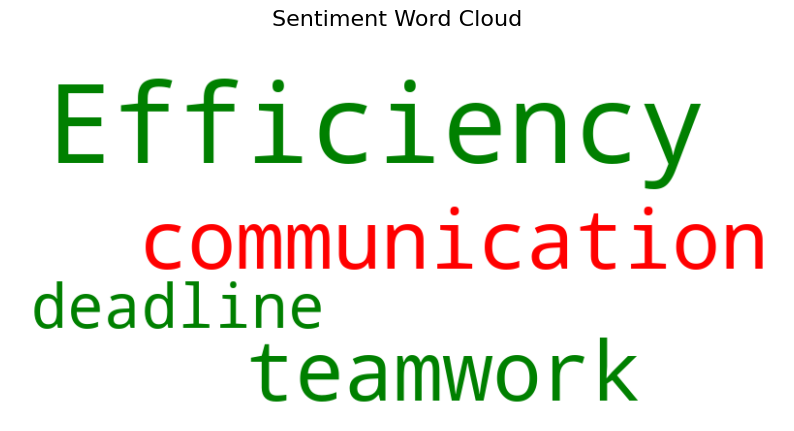

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud with colors based on sentiment
def generate_colored_word_cloud(go_well_data, not_go_well_data):
    # Combine scores and assign colors
    word_colors = {}
    combined_data = {}

    for category in go_well_data:
        go_score = go_well_data[category]
        not_go_score = not_go_well_data[category]
        net_score = go_score - not_go_score

        if net_score > 0:
            combined_data[category] = go_score  # Size proportional to go well score
            word_colors[category] = 'green'
        elif net_score < 0:
            combined_data[category] = not_go_score  # Size proportional to not go well score
            word_colors[category] = 'red'
        else:
            combined_data[category] = max(go_score, not_go_score, 1)  # Handle neutral categories
            word_colors[category] = 'orange'

    # Function to map colors to words
    def color_func(word, **kwargs):
        return word_colors.get(word, 'black')

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_data)

    # Apply color function
    wordcloud.recolor(color_func=color_func)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Sentiment Word Cloud", fontsize=16)
    plt.axis('off')
    plt.show()

# Generate and display the colored word cloud
print("Generating colored word cloud...")
generate_colored_word_cloud(go_well_data, not_go_well_data)
